<p style="text-align: center;"> COST-EFFICIENT DEFENCE AGAINST UNMANNED AERIAL SYSTEMS </p>

---

In [154]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

from simulation import Simulation
from sim_utils import get_combinations, num_of_drones
from asset import Asset
from effector import Effector
from observer import Observer
from threat import Threat

from utils import read_json

In [156]:
objects = read_json("objects")
threats = objects["threats"]
combinations = get_combinations(objects)
combinations

[({'type': 'active radar',
   'value': 1000,
   'parameters': {'MC': {'a': 0.00718,
     'b': -0.184,
     'c': 1.24,
     'xmin': 2,
     'xmax': 10.5},
    'FW': {'a': 0.00267, 'b': -0.12, 'c': 1.43, 'xmin': 5, 'xmax': 20}}},
  {'type': 'jamming',
   'value': 2,
   'parameters': {'MC': {'a': 0.05, 'b': 0.5, 'c': 1.35, 'xmin': 1, 'xmax': 5},
    'FW': {'a': 0.05, 'b': 0.5, 'c': 1.35, 'xmin': 1, 'xmax': 0}}}),
 ({'type': 'active radar',
   'value': 1000,
   'parameters': {'MC': {'a': 0.00718,
     'b': -0.184,
     'c': 1.24,
     'xmin': 2,
     'xmax': 10.5},
    'FW': {'a': 0.00267, 'b': -0.12, 'c': 1.43, 'xmin': 5, 'xmax': 20}}},
  {'type': 'spoofing',
   'value': 20,
   'parameters': {'MC': {'a': 0.67,
     'b': -1.8,
     'c': 1.2,
     'xmin': 0.2,
     'xmax': 1},
    'FW': {'a': 0.67, 'b': -1.8, 'c': 1.2, 'xmin': 0.2, 'xmax': 1}}}),
 ({'type': 'active radar',
   'value': 1000,
   'parameters': {'MC': {'a': 0.00718,
     'b': -0.184,
     'c': 1.24,
     'xmin': 2,
     'xmax':

In [163]:
def simulate_all_combinations():
    value = 1_000_000
    result_dict = {}
    for combo in combinations:
        effectors = [combo[1]]
        observers = [combo[0]]
        asset = Asset(value, effectors, observers)
        threats = [Threat(**objects["threats"][i], asset=asset) for i in range(2)]
        sim = Simulation(asset, threats)
        avg_cost, cost_std, prob = sim.simulate_n_attacks(100_000)
        
        result_dict[f"{effectors[0]['type']}-{observers[0]['type']}"] = {"avg_cost": avg_cost, "cost_std": cost_std, "prob": prob}
    
    return result_dict

In [164]:
sim_res = simulate_all_combinations()

In [165]:
sim_res

{'jamming-active radar': {'avg_cost': np.float64(800.8016),
  'cost_std': np.float64(28301.28477650153),
  'prob': 0.0008},
 'spoofing-active radar': {'avg_cost': np.float64(21261.6648),
  'cost_std': np.float64(144330.5002694456),
  'prob': 0.02124},
 'rf-active radar': {'avg_cost': np.float64(0.0),
  'cost_std': np.float64(0.0),
  'prob': 0.0},
 'remote weapon station-active radar': {'avg_cost': np.float64(20564.648),
  'cost_std': np.float64(142008.5237942994),
  'prob': 0.02054},
 'jamming-low-cost': {'avg_cost': np.float64(1240.00372),
  'cost_std': np.float64(35191.900073533194),
  'prob': 0.00124},
 'spoofing-low-cost': {'avg_cost': np.float64(21540.45234),
  'cost_std': np.float64(145178.902057039),
  'prob': 0.02154},
 'rf-low-cost': {'avg_cost': np.float64(30.00093),
  'cost_std': np.float64(5477.313207497736),
  'prob': 3e-05},
 'remote weapon station-low-cost': {'avg_cost': np.float64(20484.11648),
  'cost_std': np.float64(141663.80892608484),
  'prob': 0.02048},
 'jamming-

In [166]:
avg_costs = []
cost_stds = []

for k, v in sim_res.items():
    avg_costs.append(v["avg_cost"])
    cost_stds.append(v["cost_std"])

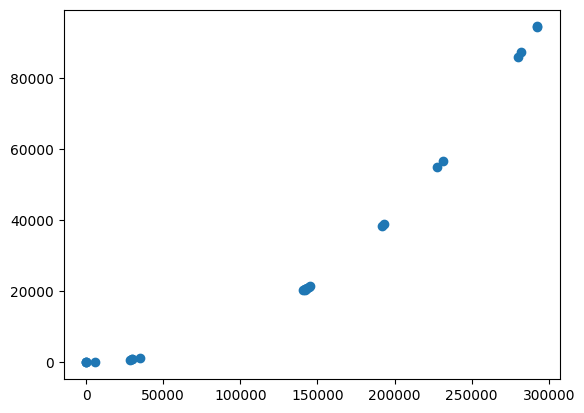

In [167]:
plt.scatter(cost_stds, avg_costs)